<a href="https://colab.research.google.com/github/ashirm1999/CS6620-DMT/blob/main/CS_6220_Random_Forest_Ashir_Mehtaipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA

## Reading the data

In [2]:
df_train = pd.read_csv('/content/drive/MyDrive/CS6220 Data/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CS6220 Data/test.csv')

In [3]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
X = df_train.drop(['ID_code', 'target'], axis = 1)
y = df_train['target']

## Split the data into train and test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify= y, test_size =0.3, random_state=42)

## Training the model

In [6]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
y_pred = model.predict(X_test)

In [8]:
print('Accuracy', accuracy_score(y_test, y_pred))
print('F1 score', f1_score(y_test, y_pred, average='macro'))

Accuracy 0.8995333333333333
F1 score 0.4737202816312401


## Applying PCA for dimension reduction

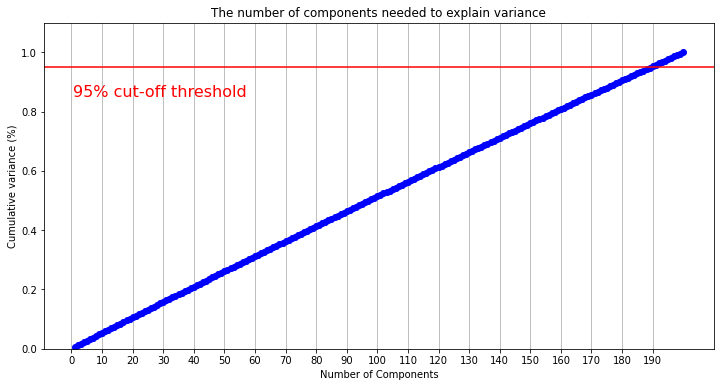

In [9]:
x = StandardScaler().fit_transform(X)
pca = PCA().fit(x)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 201, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 200, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 170)
principalComponents = pca.fit_transform(x)

In [11]:
principalDf = pd.DataFrame(data = principalComponents, columns = list(range(1, 171, 1)))

In [ ]:
finalDf = pd.concat([principalDf, df_train['target']], axis = 1)

In [ ]:
finalDf

In [ ]:
X_pca = finalDf.drop(['target'], axis = 1)
y_pca = finalDf['target']

In [15]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, stratify = y_pca, test_size=0.3, random_state=42)

In [16]:
model_pca = RandomForestClassifier()
model_pca.fit(X_train_pca, y_train_pca)

RandomForestClassifier()

In [17]:
y_pred_pca = model_pca.predict(X_test_pca)

In [18]:
print('Accuracy', accuracy_score(y_test_pca, y_pred_pca))
print('F1 score', f1_score(y_test_pca, y_pred_pca, average='macro'))

Accuracy 0.91285
F1 score 0.6536592863017827


In [19]:
results = pd.DataFrame([], columns = ['Model', 'Accuracy', 'F1_Score'])

In [21]:
results

,Model,Accuracy,F1_Score
0,RF without PCA,89.95,47.37
1,RF with PCA,91.28,65.36
